In [ ]:
# 5강 
# learning rate에 따른 정확성 확인
# learning_rate와 학습 횟수를 적절하게 조절해야 최대한의 학습속도를 낼 수 있다
# 최소한의 학습횟수로 최대한의 효과를 내야 효율적이다

import tensorflow as tf

LEARNING_RATE=0.01

x_data = [[ 1, 2, 1], [ 1, 3, 2], [ 1, 3, 4], [ 1, 5, 5], [ 1, 7, 5], [ 1, 2, 5], [ 1, 6, 6], [ 1, 7, 7]] 
y_data = [[ 0, 0, 1], [ 0, 0, 1], [ 0, 0, 1], [ 0, 1, 0], [ 0, 1, 0], [ 0, 1, 0], [ 1, 0, 0], [ 1, 0, 0]] 

# Evaluation our model using this test dataset

x_test = [[ 2, 1, 1], [ 3, 1, 2], [ 3, 3, 4]]
y_test = [[ 0, 0, 1], [ 0, 0, 1], [ 0, 0, 1]]


X= tf.placeholder ("float", [None, 3])
Y= tf.placeholder ("float", [ None, 3]) 
W= tf.Variable (tf.random_normal ([ 3, 3]))
b= tf.Variable (tf.random_normal ([ 3]))

# tf.nn.softmax computes softmax activations
# softmax = exp (logits ) / reduce_sum (exp (logits ), dim )
hypothesis = tf.nn.softmax (tf.matmul (X, W) + b)

# Cross entropy cost /loss 
cost = tf.reduce_mean (-tf.reduce_sum (Y* tf.log (hypothesis ), axis =1))

# Try to change learning_rate to small numbers 
optimizer = tf.train.GradientDescentOptimizer (learning_rate =LEARNING_RATE). minimize (cost )


# Correct prediction Test model 
prediction = tf.arg_max (hypothesis , 1)
is_correct = tf.equal (prediction , tf.arg_max (Y, 1))
accuracy = tf.reduce_mean (tf.cast (is_correct , tf.float32)) 



# Launch graph with 
# tf.Session으로 생성된 sess라는 변수를 통해서 쓴다
# sess=tf.Session()이랑 똑같은데, 이 블럭에서만 쓴다

with tf.Session () as sess :

    # Initialize TensorFlow variables
    sess.run (tf.global_variables_initializer ()) 
    for step in range (101 ): 
        cost_val , W_val , _ = sess.run ([cost , W, optimizer ], feed_dict ={ X: x_data , Y: y_data })
        if step%50 == 0 :
            print ("\nstep : ", step , "\ncost_val : ", cost_val , "\nW_val :\n ", W_val )
    
    # predict
    print ("\nPrediction :" , sess.run (prediction , feed_dict ={ X: x_test })) 

    # Calculate the accuracy 
    print ("\nAccuracy: " , sess.run (accuracy , feed_dict ={ X: x_test , Y: y_test }))


In [ ]:
# 정규화 되지 않은 데이터
xy = np.array ([[ 828.659973 , 833.450012 , 908100 , 828.349976 , 831.659973 ],
                [823.02002 , 828.070007 , 1828100 , 821.655029 , 828.070007 ], 
                [819.929993 , 824.400024 , 1438100 , 818.97998 , 824.159973 ], 
                [816 , 820.958984 , 1008100 , 815.48999 , 819.23999 ],
                [819.359985 , 823 , 1188100 , 818.469971 , 818.97998 ], 
                [819 , 823 , 1198100 , 816 , 820.450012 ], 
                [811.700012 , 815.25 , 1098100 , 809.780029 , 813.669983 ], 
                [809.51001 , 816.659973 , 1398100 , 804.539978 , 809.559998 ]])


x_data = xy [:, 0:-1]
y_data = xy [:, [ -1]]


# placeholders for atensor that will be always fed .
X= tf.placeholder (tf.float32, shape =[None , 4])
Y= tf.placeholder (tf.float32, shape =[None , 1])

W= tf.Variable (tf.random_normal ([ 4, 1]), name ='weight')
b= tf.Variable (tf.random_normal ([ 1]), name ='bias')

# Hypothesis 
hypothesis = tf.matmul (X, W) + b

# Simplified cost /loss function 
cost = tf.reduce_mean (tf.square (hypothesis -Y)) 

# Minimize 
optimizer = tf.train.GradientDescentOptimizer (learning_rate =1e-5)
train = optimizer.minimize (cost )

# Launch the graph in asession .
sess = tf.Session () 

# Initializes global variables in the graph .
sess.run (tf.global_variables_initializer ()) 

for step in range (101 ): 
    cost_val , hy_val , _ = sess.run ([cost , hypothesis , train ], feed_dict ={ X: x_data , Y: y_data }) 
    if step%10 ==0 :
        print ("\nstep:",step, "\nCost : ", cost_val , "\nPrediction:\n", hy_val )
        
        
        
        
# 분석을 못한다

In [ ]:
# 정규화 되지 않은 데이터
# min-max scale을 이용하여 정규화를 시킨다

def MinMaxScaler (data ):
    numerator = data -np.min (data , 0)
    denominator = np.max (data , 0) -np.min (data , 0)
    # noise term prevents the zero division
    return numerator / ( denominator + 1e-7)
    

xy = np.array ([[ 828.659973 , 833.450012 , 908100 , 828.349976 , 831.659973 ],
                [823.02002 , 828.070007 , 1828100 , 821.655029 , 828.070007 ], 
                [819.929993 , 824.400024 , 1438100 , 818.97998 , 824.159973 ], 
                [816 , 820.958984 , 1008100 , 815.48999 , 819.23999 ],
                [819.359985 , 823 , 1188100 , 818.469971 , 818.97998 ], 
                [819 , 823 , 1198100 , 816 , 820.450012 ], 
                [811.700012 , 815.25 , 1098100 , 809.780029 , 813.669983 ], 
                [809.51001 , 816.659973 , 1398100 , 804.539978 , 809.559998 ]])


xy=MinMaxScaler(xy)
print(xy)


x_data = xy [:, 0:-1]
y_data = xy [:, [ -1]]


# placeholders for atensor that will be always fed .
X= tf.placeholder (tf.float32, shape =[None , 4])
Y= tf.placeholder (tf.float32, shape =[None , 1])

W= tf.Variable (tf.random_normal ([ 4, 1]), name ='weight')
b= tf.Variable (tf.random_normal ([ 1]), name ='bias')

# Hypothesis 
hypothesis = tf.matmul (X, W) + b

# Simplified cost /loss function 
cost = tf.reduce_mean (tf.square (hypothesis -Y)) 

# Minimize 
optimizer = tf.train.GradientDescentOptimizer (learning_rate =1e-5)
train = optimizer.minimize (cost )

# Launch the graph in asession .
sess = tf.Session () 

# Initializes global variables in the graph .
sess.run (tf.global_variables_initializer ()) 

for step in range (101): 
    cost_val , hy_val , _ = sess.run ([cost , hypothesis , train ], feed_dict ={ X: x_data , Y: y_data }) 
    if step%10 ==0 :
        print ("\nstep:",step, "\nCost : ", cost_val , "\nPrediction:\n", hy_val )
        

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Label :  [2]
Prediction :  [2]


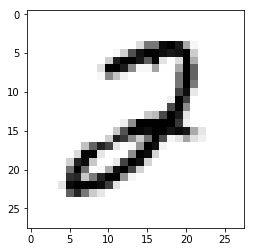

In [12]:
-